In [2]:
%matplotlib inline

import os

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')

MG

In [ ]:
S = 2
M = 4
EPS = 0.01

N_MINORITIES = 101
N_PRODUCERS = 0
N_SPECULATORS = 0

N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS

N_ITERS = 10000
N_RUNS = 4

GCMG

In [3]:
S = 2
M = 4
EPS = 0.01

N_MINORITIES = 0

N_PRODUCERS = 1200
N_SPECULATORS = 1001

# N_PRODUCERS = 1000
# N_SPECULATORS = 501
N_CHEATINGS = 0

N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS + N_CHEATINGS

SUCCESS_RATE = 0

N_ITERS = 50000
N_RUNS = 5

## price distribution (S=2, M=8, N=101)

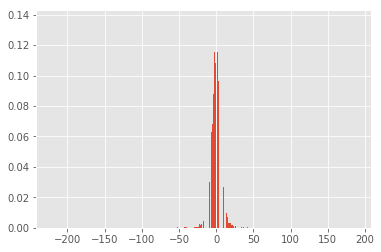

In [6]:
DIR = "../results/s{}_m{}_eps{:.2f}_srate{:.2f}_nmins{}_npros{}_nspes{}_nches{}_niters{}_nruns{}/".format(
    S, M, EPS, SUCCESS_RATE, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_CHEATINGS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_0.csv')

data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')

data = data[30000:]

plt.hist(data, bins='auto', density=True)

# plt.yscale('log')

# plt.ylim(1e-7, 1e-0)

plt.show()

## Price return distribution (cumulative)

(1e-06, 1)

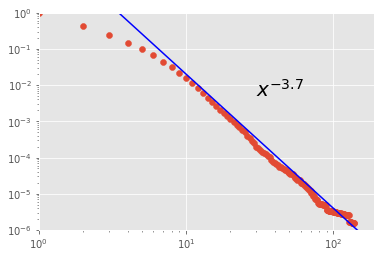

In [9]:
S = 2
M = 4
EPS = 0.01

N_MINORITIES = 0

N_PRODUCERS = 1200
N_SPECULATORS = 1001

N_CHEATINGS = 0

N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS + N_CHEATINGS

SUCCESS_RATE = 0

N_ITERS = 50000
N_RUNS = 5

DIR = "../results/s{}_m{}_eps{:.2f}_srate{:.2f}_nmins{}_npros{}_nspes{}_nches{}_niters{}_nruns{}/".format(
    S, M, EPS, SUCCESS_RATE, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_CHEATINGS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_0.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
excess_demands = excess_demands[30000:]

x_max = np.max(excess_demands)

positive_return = np.sort(np.array([elem for elem in excess_demands if elem > 0]))
# negative_return = np.array([elem for elem in excess_demands if elem < 0])

xs = np.linspace(1, x_max, x_max, dtype='int32')
counts, _ = np.histogram(positive_return, bins=xs.tolist() + [x_max + 1])
ys = []
summ = np.sum(counts)
for i in range(len(counts)):
    prob = np.sum(counts[i:]) / summ
    ys.append(prob)
    
ys = np.array(ys)

ys = ys / xs # Divided by return

plt.scatter(xs, ys)

# Powerlaw fitting
ws = np.float_power(xs, -3.7) * 100
plt.plot(xs, ws, c='blue')

plt.text(10 * 3, 1e-2 * 0.5, r'$x^{-3.7}$', fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, x_max)
plt.ylim(1e-6, 1)

## Volatility clustering

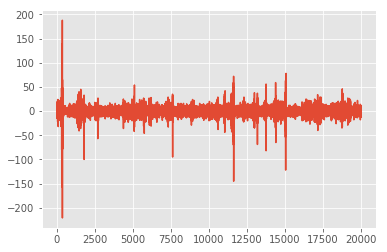

In [12]:
excess_demands_path = os.path.join(DIR, 'excess_demand_0.csv')
buys_path = os.path.join(DIR, 'buys_0.csv')
sells_path = os.path.join(DIR, 'sells_0.csv')
attendance_path = os.path.join(DIR, 'attendance_0.csv')

excess_demands = np.fromstring(open(excess_demands_path).read().strip(), sep=',').astype('float32')
buys = np.fromstring(open(buys_path).read().strip(), sep=',').astype('float32')
sells = np.fromstring(open(sells_path).read().strip(), sep=',').astype('float32')
attendance = np.fromstring(open(attendance_path).read().strip(), sep=',').astype('float32')

r = excess_demands
r = r[30000:]

plt.plot(r)

## Autocorrelation in absolute returns

In [14]:
def compute_autocorrelation(x, tau):
    x_tau = x[tau:]
    
    x1 = np.abs(x_tau)
    x2 = np.abs(x[:-tau])
    
    corr, _ = stats.pearsonr(x1, x2)
    return corr

100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


(1e-05, 1)

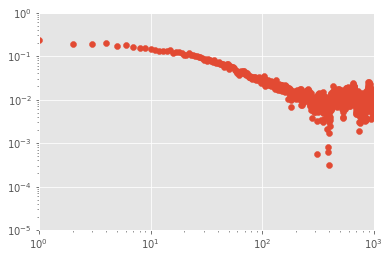

In [15]:
DIR = "../results/s{}_m{}_eps{:.2f}_srate{:.2f}_nmins{}_npros{}_nspes{}_nches{}_niters{}_nruns{}/".format(
    S, M, EPS, SUCCESS_RATE, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_CHEATINGS, N_ITERS, N_RUNS)

corrs = np.zeros((N_RUNS, 1000))
taus = np.arange(1, 1001)

for run in tqdm(range(N_RUNS)):
    path = os.path.join(DIR, 'excess_demand_{}.csv'.format(run))
    excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
    excess_demands = excess_demands[30000:]
    r = excess_demands

    _corrs = []
    for tau in taus:
        corr = compute_autocorrelation(r, tau)
        _corrs.append(corr)
    
    _corrs = np.array(_corrs)
    
    corrs[run] = _corrs

corrs = np.mean(corrs, 0)

plt.scatter(taus, corrs)

plt.xscale('log')
plt.yscale('log')

# xs = taus
# ws = np.float_power(xs, -0.1)

# plt.plot(xs, ws, c='blue')

plt.xlim(1, 1e+3)
plt.ylim(1e-5, 1)

In [ ]:
path = os.path.join(DIR, 'excess_demand_0.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')

plt.plot(excess_demands[30000:])

(1e-05, 1)

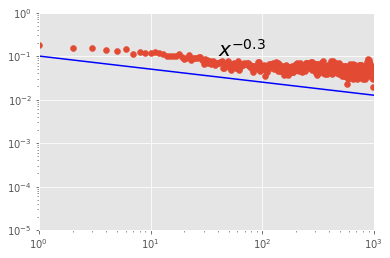

In [38]:
S = 2
M = 4
EPS = 0.01

N_MINORITIES = 0

# N_PRODUCERS = 1000
# N_SPECULATORS = 501
N_PRODUCERS = 1200
N_SPECULATORS = 1001

N_CHEATINGS = 0

N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS + N_CHEATINGS

SUCCESS_RATE = 0

N_ITERS = 50000
N_RUNS = 15

DIR = "../results/s{}_m{}_eps{:.2f}_srate{:.2f}_nmins{}_npros{}_nspes{}_nches{}_niters{}_nruns{}/".format(
    S, M, EPS, SUCCESS_RATE, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_CHEATINGS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_2.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
excess_demands = excess_demands[30000:]
r = excess_demands

corrs = []
taus = []
for tau in range(1, 1001):
    r_tau = r[tau:]
    
    x1 = np.abs(r_tau)
    x2 = np.abs(r[:-tau])
    
    corr, _ = stats.pearsonr(x1, x2)
    corrs.append(corr)
    taus.append(tau)

plt.scatter(taus, corrs)

plt.xscale('log')
plt.yscale('log')

xs = taus
ws = np.float_power(xs, -0.3) * 0.1

plt.text(10 * 4, 1e-1, r'$x^{-0.3}$', fontsize=20)

plt.plot(xs, ws, c='blue')

plt.xlim(1, 1e+3)
plt.ylim(1e-5, 1)

In [ ]:
np.mean(np.abs(excess_demands))

In [ ]:
fig = plt.figure(figsize=(20, 12))

taus = np.arange(1, 1001)

i = 1
# for rate in [0.6, 0.8, 1.0]:
for rate in [0.8, 1.0]:
#     for n_cheas in [10, 50, 100, 500]:
    for n_cheas in [10, 100, 500]:
        dr = "../results/s{}_m{}_eps{:.2f}_srate{:.2f}_nmins{}_npros{}_nspes{}_nches{}_niters{}_nruns{}/".format(
            S, M, EPS, rate, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, n_cheas, N_ITERS, N_RUNS)

        path = os.path.join(dr, 'excess_demand_0.csv')
        r = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
        r = r[30000:]
        
        corrs = []
        for tau in taus:
            corr = compute_autocorrelation(r, tau)
            corrs.append(corr)
        corrs = np.array(corrs)
        
        ax = fig.add_subplot(2, 3, i)
        i += 1
        
        ax.scatter(taus, corrs)
        
        xs = taus
        ws = np.float_power(xs, -0.3) * 0.1

        plt.text(10 * 4, 1e-1, r'$x^{-0.3}$', fontsize=20)
        
        plt.plot(xs, ws, c='blue')

        ax.set_title(r'$r = {}, N = {}$'.format(rate, n_cheas))
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        ax.set_xlim(1, 1e+3)
        ax.set_ylim(1e-5, 1)

## Attendance standard deviations (S=2, various M, N = 101)

In [ ]:
S = 2

x = []
y = []

for m in np.arange(1, 12):
    DIR = "../results/s{}_m{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/".format(
        S, m, EPS, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_ITERS, N_RUNS)
    for r in np.arange(N_RUNS):
        path = os.path.join(DIR, 'buys_%d.csv' % (r))
        data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
        
        x.append(2**m / N_AGENTS)
        y.append(np.var(data) / N_AGENTS)

x = np.array(x)
y = np.array(y)

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.scatter(x=x, y=y, marker='.')

ax.set_xlabel(r'$^{2^m}/_N$')
ax.set_ylabel(r'$^{\sigma^2}/_N$')

ax.set_xlim(0.01, 10000)
ax.set(xscale='log', yscale='log')

plt.show()

## Attendance standard deviations (S=2, various M, various N)

In [ ]:
S = 2
N_ITERS = 10000
N_RUNS = 32
MIN_M = 1
MAX_M = 16

markers = ['o', 'v', '^', '<', '>', 's']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i, n in enumerate([11, 51, 101, 251, 501, 1001]):
    x = []
    y = []
    for m in np.arange(MIN_M, MAX_M + 1):
        _y = []
        for r in np.arange(N_RUNS):
            dr = "results/m%d_s%d_nagents%d_niters%d_nruns%d/" % (m, S, n, N_ITERS, N_RUNS)
            path = os.path.join(dr, 'attendance_%d.csv' % (r + 1))
            data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
            
            _y.append(np.var(data) / n)
        
        x.append(2**m / n)
        y.append(np.mean(_y))
    
    x = np.array(x)
    y = np.array(y)
    
    ax.scatter(x, y, marker=markers[i], label=r'$N=%d$'%n)

ax.axhline(y=0.25, color='grey', linestyle='--')
ax.text(0.005, 0.25, '0.25')

ax.set_xlabel(r'$\alpha = ^{2^m}/_N$')
ax.set_ylabel(r'$^{\sigma^2}/_N$')

ax.set_xlim(0.01, 10000)
ax.set_ylim(0.05, 10)
ax.set(xscale='log', yscale='log')

ax.legend()
plt.show()